## Aim:

**(1)  to identify patterns in the data and important features that may impact a ML model.**

**(2)  Using machine learning models predict covid-19**

### Introduction:

**Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.**
Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.

- Thus, accurately predicting COVID-19 and understanding the symptoms are very important.
- ML algorithms could be good for predicting the COVID-19

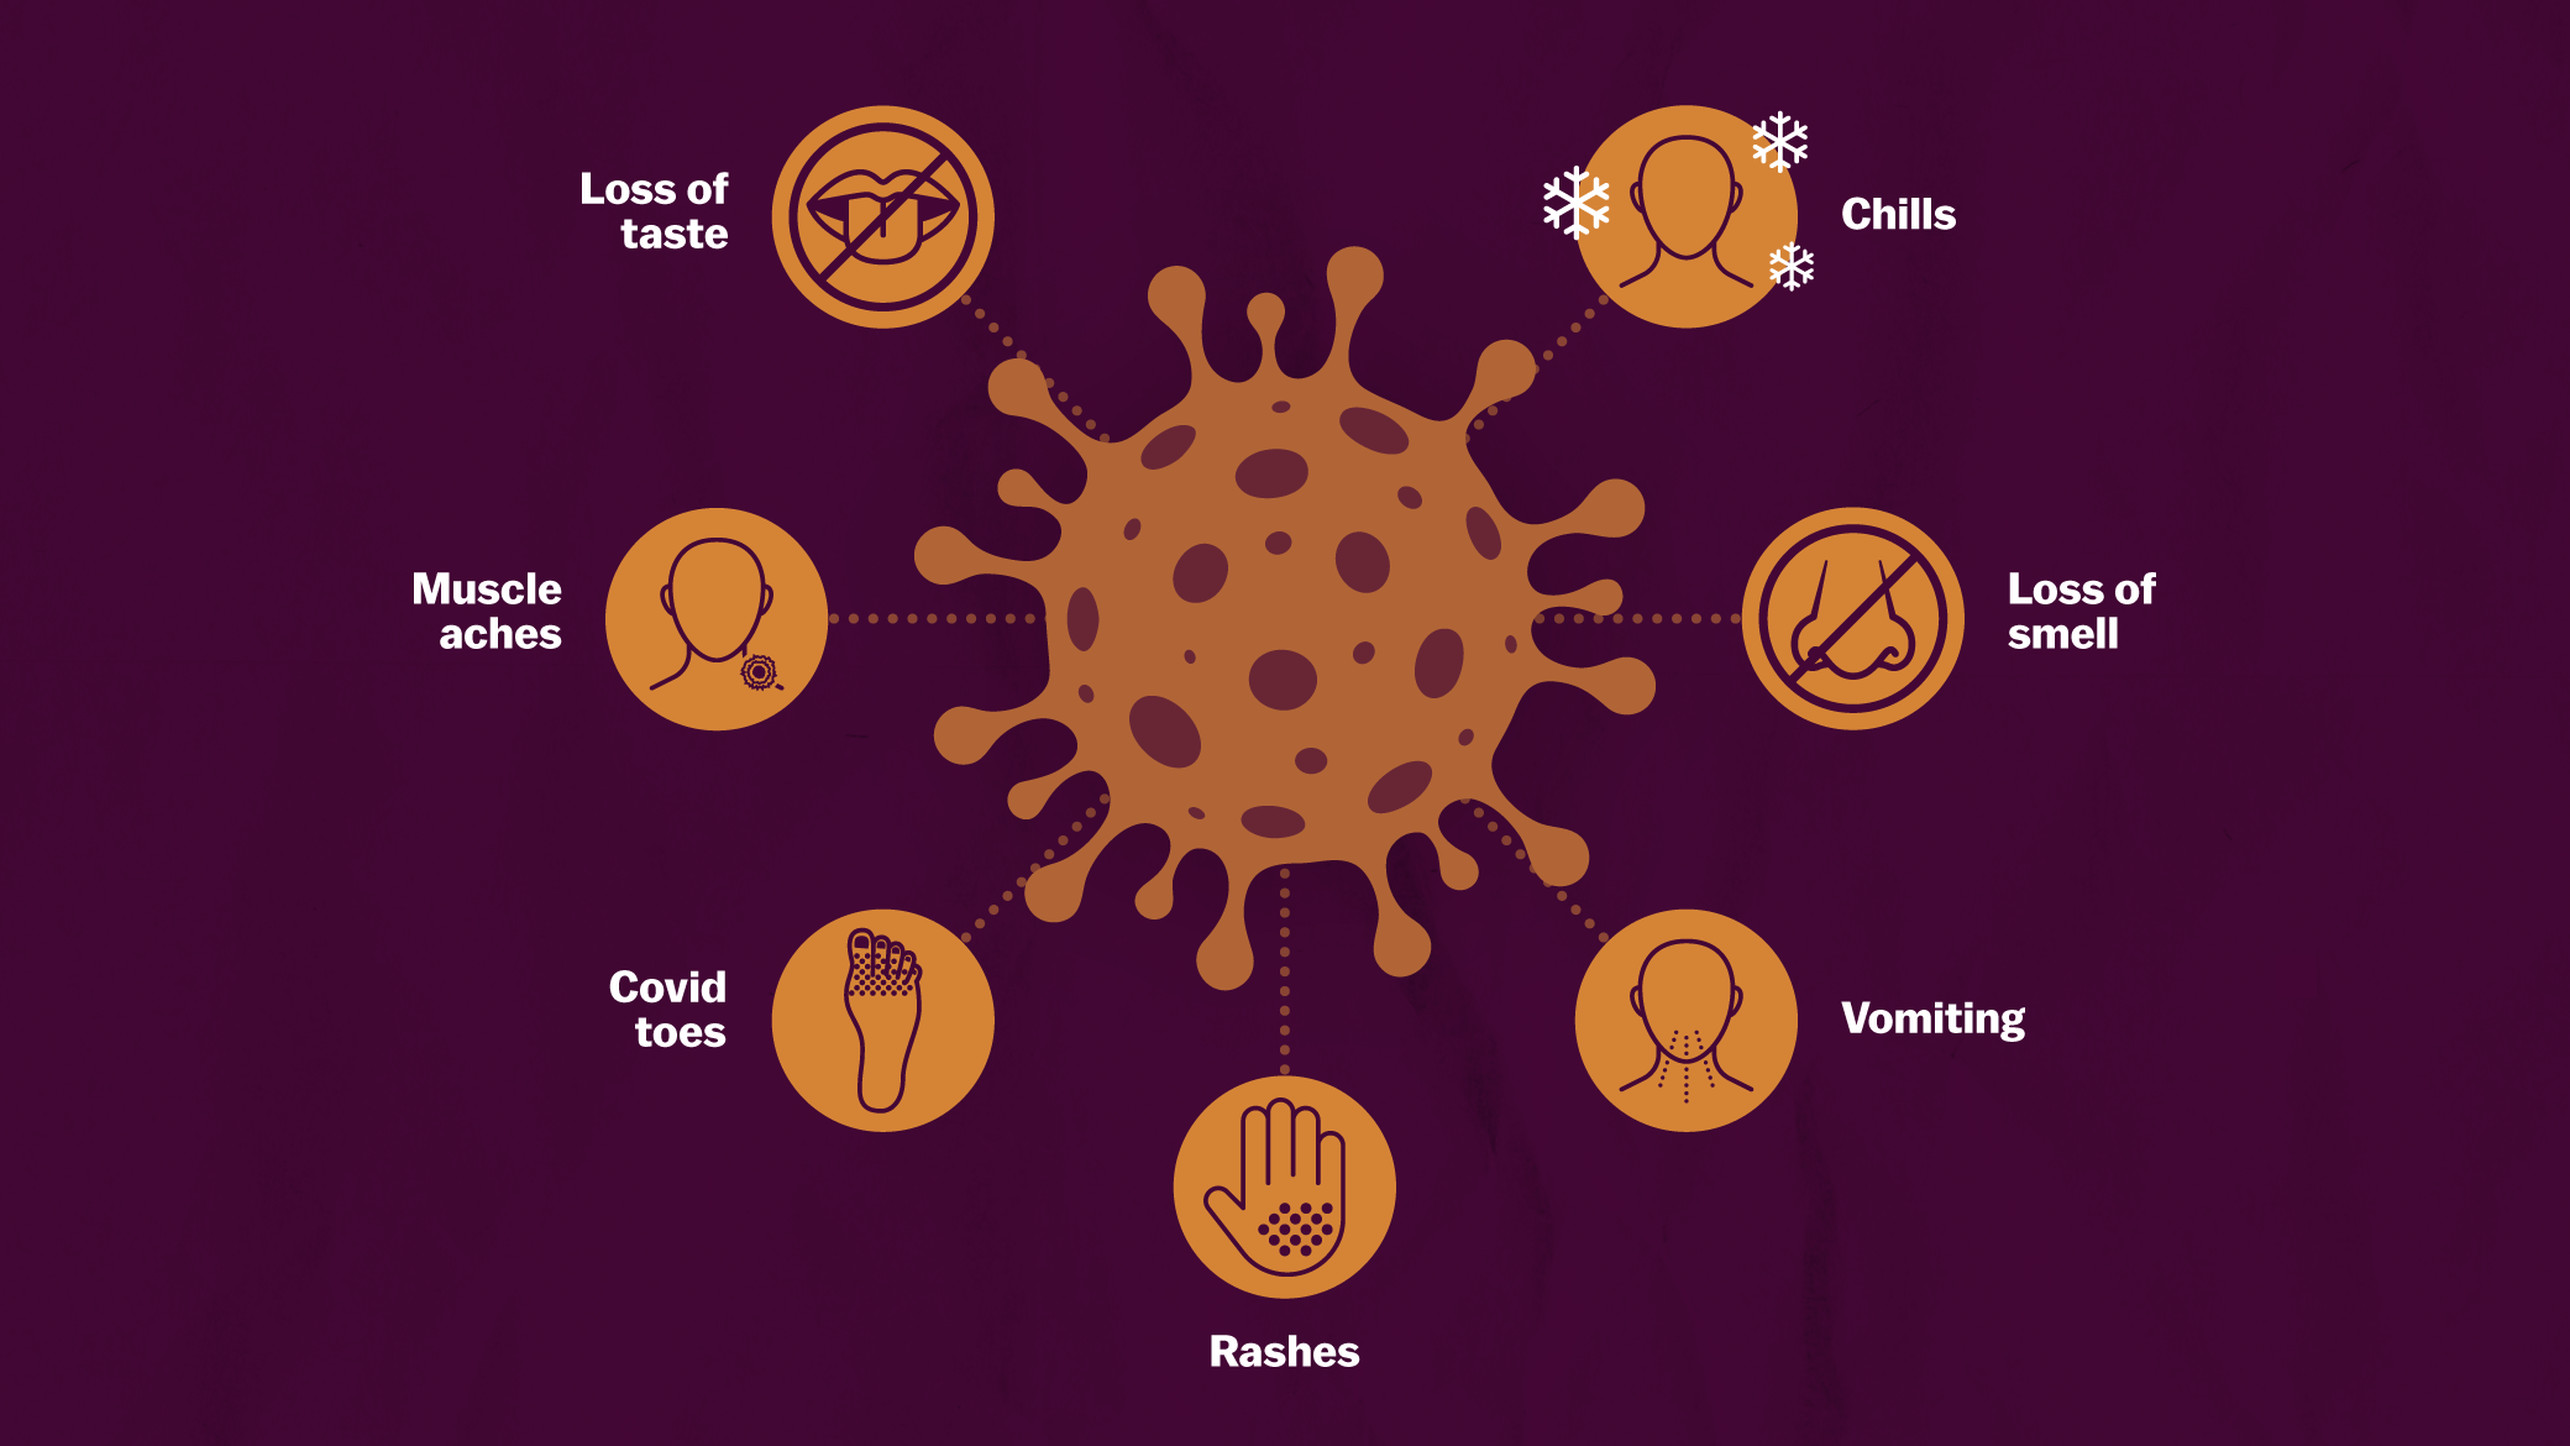

In [62]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew
import missingno as msno
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir('C:\\Users\\zainu\\Downloads')

In [4]:
# Importing dataset
covid_raw = pd.read_csv("corona_tested_006.csv")

In [5]:
# Making copy of dataset
covid = covid_raw.copy()

In [6]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


### Description of variables in our dataset

### Categorical variable

**1. Ind_ID**: This seems to be an individual identifier, likely a unique identification number assigned to each person in our dataset.

**2. Cough_symptoms**: Indicates whether the individual experienced coughing as a symptom.

**3. Fever**: Indicates whether the individual had a fever or not.

**4. Sore_throat**: Indicates whether the individual experienced a sore throat or not.

**5. Shortness_of_breath**: Indicates whether the individual had shortness of breath (binary).

**6. Headache**: Indicates whether the individual experienced headache as a symptom (binary).

**7. Age_60_above**: Indicates whether the individual is 60 years old or above (binary).

**8. Sex**: The gender of the individual, which could be categorized as male, female, or another representation.

**9. Known_contact**: Indicates whether the individual had known contact with a confirmed COVID-19 case.


**Test_date**: The date on which the COVID-19 test was conducted for each individual.


### Target variable

**Corona**: It indicates the outcome of the COVID-19 test, with values like positive, negative.

In [7]:
covid.shape

(278848, 11)

According to domain Common symptoms of COVID-19 include:

- Fever or chills
- Cough
- Shortness of breath or difficulty breathing
- Fatigue
- Muscle or body aches
- Headache
- Loss of taste or smell
- Sore throat
- Congestion or runny nose
- Nausea or vomiting
- Diarrhea

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


It is showing that the dataset indicates that there are no missing values.

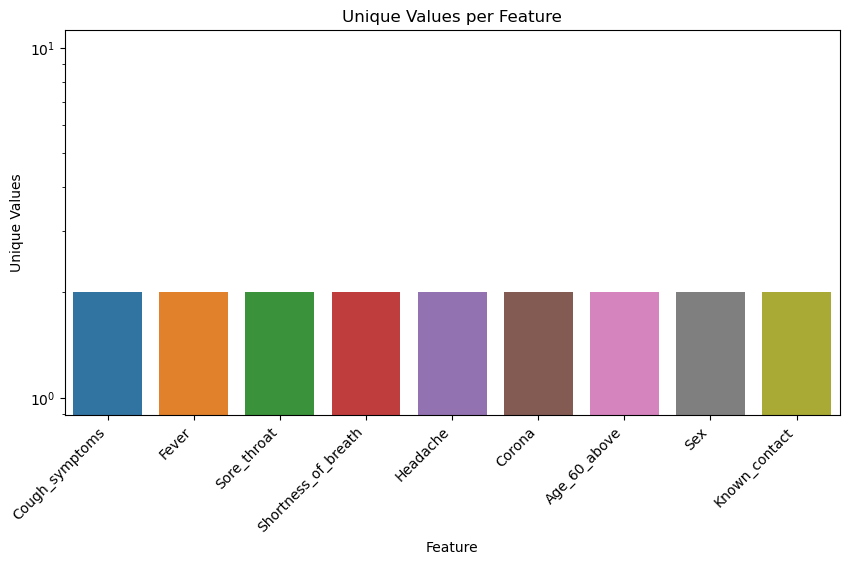

In [81]:
numeric_features = covid.select_dtypes(include="object")

# Count unique values for each feature
unique_values = numeric_features.nunique().sort_values()

# Using Matplotlib
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_values.index, y=unique_values.values, log=True)
plt.title("Unique Values per Feature")
plt.xlabel("Feature")
plt.ylabel("Unique Values")
plt.xticks(rotation=45, ha="right")
plt.show()

We mostly have binary outcome variables in our dataset; however, there are some incorrect or inaccurate values present in these variables.

In [10]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

I am dropping the 'Ind_ID' and 'Test_date' columns as I do not find them relevant for my analysis.

In [11]:
covid.drop(columns = ['Ind_ID', 'Test_date'], inplace = True)

In [12]:
covid['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

There are some missing values in the dataset which has inserted as **other**.

In [13]:
# Replace 'other' with NaN in the 'corona' column
covid['Corona'].replace('other', np.nan, inplace=True)

# Unique values in the 'corona' column after replacement
covid['Corona'].unique()

array(['negative', 'positive', nan], dtype=object)

In [14]:
covid['Corona'].isnull().sum()

3892

After replacing 'other' with nan we have 3892 missing values in our target variable.

In [15]:
covid['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [16]:
# Replace 'Other' with NaN in the 'Known_contact' column
covid['Known_contact'].replace('Other', np.nan, inplace=True)

# Unique values in the 'Known_contact' column after replacement
covid['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', nan], dtype=object)

In [17]:
covid['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

The 'Fever' variable has many unique values because some entries are written in different cases, like 'false' and 'False'."

In [18]:
covid['Fever'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [19]:
# Replace 'None' with NaN in the 'Fever' column
covid['Fever'].replace('None', np.nan, inplace=True)

# Unique values in the 'Fever' column after replacement
covid['Fever'].unique()

array([False, True, nan], dtype=object)

In [20]:
covid['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

There are some missing values in the dataset which has inserted as **None**.

In [21]:
# Replace 'None' with NaN in the 'Age_60_above' column
covid['Age_60_above'].replace('None', np.nan, inplace=True)

# Unique values in the 'Age_60_above' column after replacement
covid['Age_60_above'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [22]:
covid['Cough_symptoms'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [23]:
# Replace 'None' with NaN in the 'Cough_symptoms' column
covid['Cough_symptoms'].replace('None', np.nan, inplace=True)

# Unique values in the 'Cough_symptoms' column after replacement
covid['Cough_symptoms'].unique()

array([True, False, nan], dtype=object)

In [24]:
covid['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [25]:
# Replace 'None' with NaN in the 'Sex' column
covid['Sex'].replace('None', np.nan, inplace=True)

# Unique values in the 'Sex' column after replacement
covid['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [26]:
covid['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [27]:
covid['Sore_throat'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [28]:
# Replace 'None' with NaN in the 'Sore_throat' column
covid['Sore_throat'].replace('None', np.nan, inplace=True)

# Unique values in the 'Sore_throat' column after replacement
covid['Sore_throat'].unique()

array([True, False, nan], dtype=object)

In [29]:
covid['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [30]:
covid['Shortness_of_breath'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [31]:
# Replace 'None' with NaN in the 'Shortness_of_breath' column
covid['Shortness_of_breath'].replace('None', np.nan, inplace=True)

# Unique values in the 'Shortness_of_breath' column after replacement
covid['Shortness_of_breath'].unique()

array([False, True, nan], dtype=object)

In [32]:
covid['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [33]:
covid['Headache'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [34]:
# Replace 'None' with NaN in the 'Headache' column
covid['Headache'].replace('None', np.nan, inplace=True)

# Unique values in the 'Headache' column after replacement
covid['Headache'].unique()

array([False, True, nan], dtype=object)

In [35]:
covid.nunique()

Cough_symptoms         2
Fever                  2
Sore_throat            2
Shortness_of_breath    2
Headache               2
Corona                 2
Age_60_above           2
Sex                    2
Known_contact          2
dtype: int64

Our binary categorical variable now has only two distinct values.

In [36]:
covid.isnull().mean()*100

Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  1.395742
Age_60_above           45.659284
Sex                     7.015650
Known_contact          87.051368
dtype: float64

<AxesSubplot:>

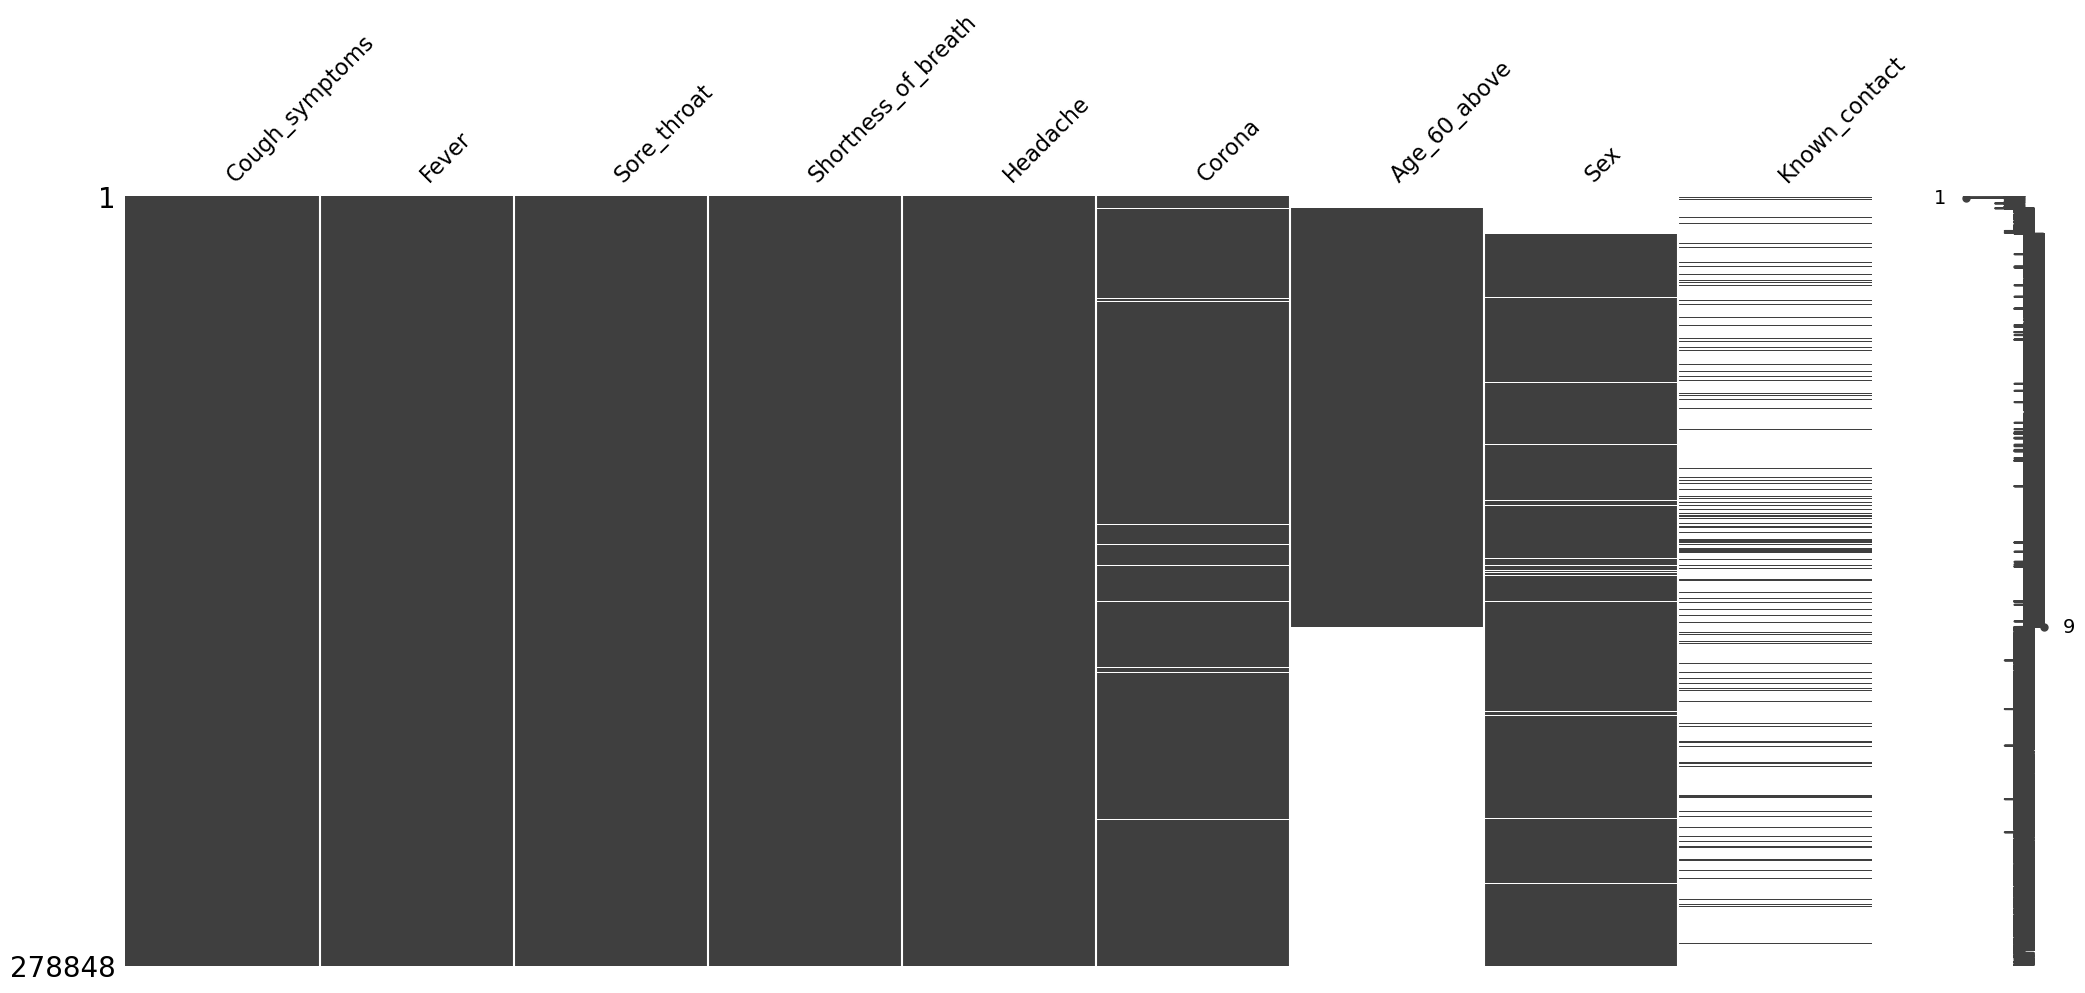

In [37]:
msno.matrix(covid)

Except Sore_throat, Shortness_of_breath and Headache mostly all the variables have missing values.

### Univariate Analysis

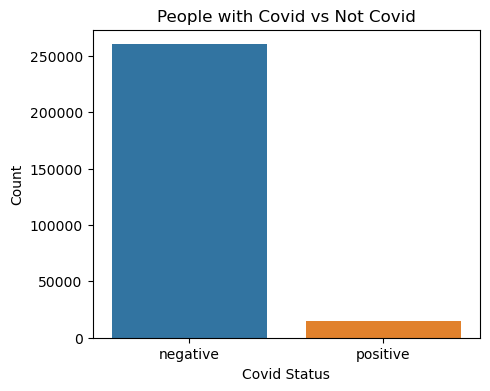

In [38]:
count = covid["Corona"].value_counts()

# Using Matplotlib
plt.figure(figsize=(5, 4))
sns.barplot(x=count.index, y=count.values)
plt.title("People with Covid vs Not Covid")
plt.xlabel("Covid Status")
plt.ylabel("Count")
plt.show()

**The bar plot analysis above indicates an imbalance within our target variable.**

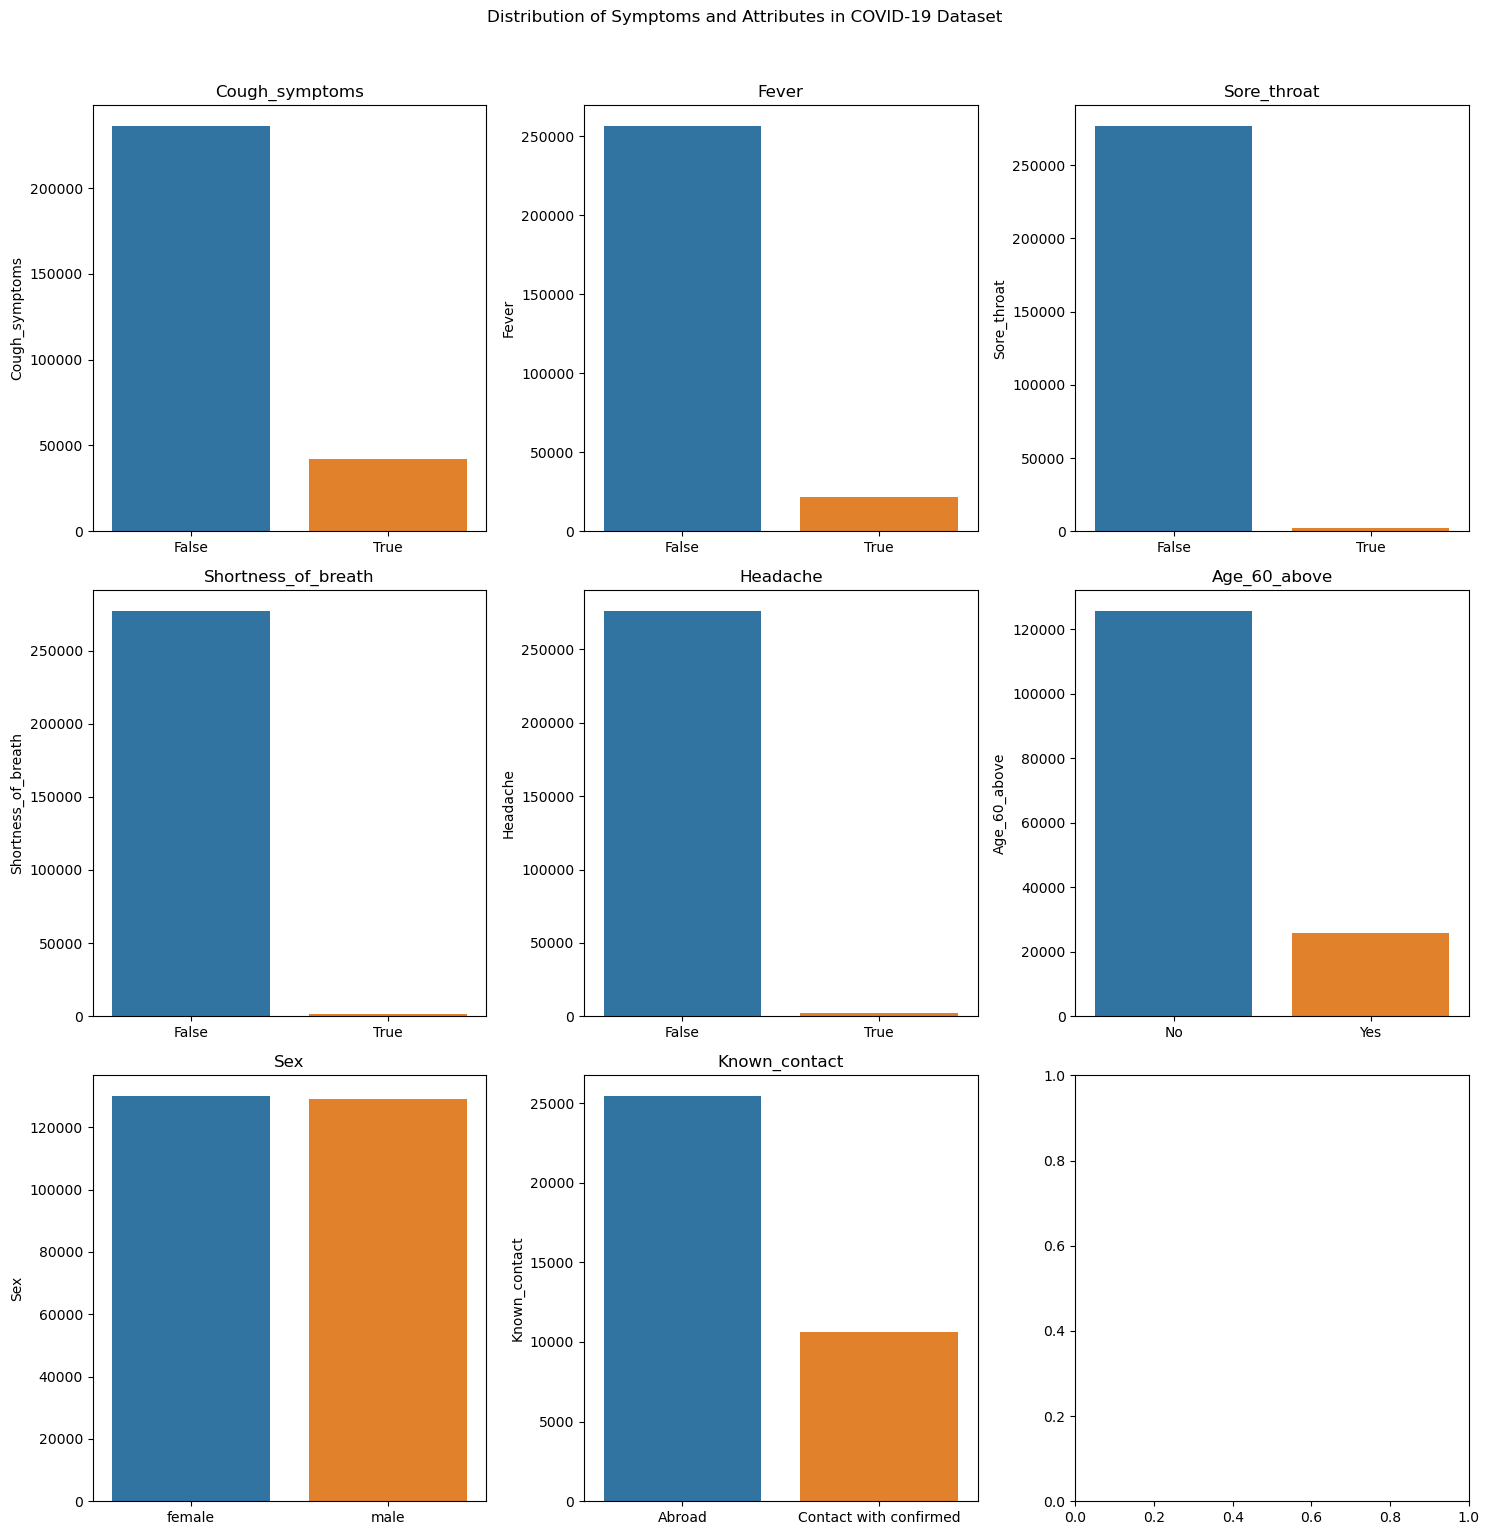

In [39]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle("Distribution of Symptoms and Attributes in COVID-19 Dataset", y=1.02)

# Bar plots for each column
for i, col in enumerate(["Cough_symptoms", "Fever", "Sore_throat", 
                         "Shortness_of_breath", "Headache", 
                         "Age_60_above", "Sex", "Known_contact"]):
    counts = covid[col].value_counts()
    sns.barplot(x=counts.index, y=counts, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

**The bar plot distribution indicates that the majority of our variables exhibit imbalance.**

### Feature Encoding

In [40]:
# Drop Known_contact variable beacuse it has 87% missing values
covid_encoded = covid.drop(columns = ['Known_contact'])

In [41]:
# encoding by using map function
covid_encoded["Cough_symptoms"] = covid_encoded['Cough_symptoms'].map({True : 1, False : 0, np.nan : np.nan})
covid_encoded["Fever"] = covid_encoded['Fever'].map({True : 1, False : 0, np.nan : np.nan})
covid_encoded["Sore_throat"] = covid_encoded['Sore_throat'].map({True : 1, False : 0, np.nan : np.nan})
covid_encoded["Shortness_of_breath"] = covid_encoded['Shortness_of_breath'].map({True : 1, False : 0, np.nan : np.nan})
covid_encoded["Headache"] = covid_encoded['Headache'].map({True : 1, False : 0, np.nan : np.nan})
covid_encoded["Corona"] = covid_encoded['Corona'].map({'positive' : 1, 'negative' : 0, np.nan : np.nan})
covid_encoded["Sex"] = covid_encoded['Sex'].map({'male' : 1, 'female' : 0, np.nan : np.nan})
covid_encoded["Age_60_above"] = covid_encoded['Age_60_above'].map({'Yes' : 1, 'No' : 0, np.nan : np.nan})

In [42]:
covid_encoded.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
2,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


### Bivariate Analysis

In [43]:
# Create a contingency table
contingency_table = pd.crosstab(covid_encoded['Corona'], covid_encoded['Cough_symptoms'])

# Display the contingency table
print(contingency_table)

Cough_symptoms     0.0    1.0
Corona                       
0.0             225021  34987
1.0               8112   6584


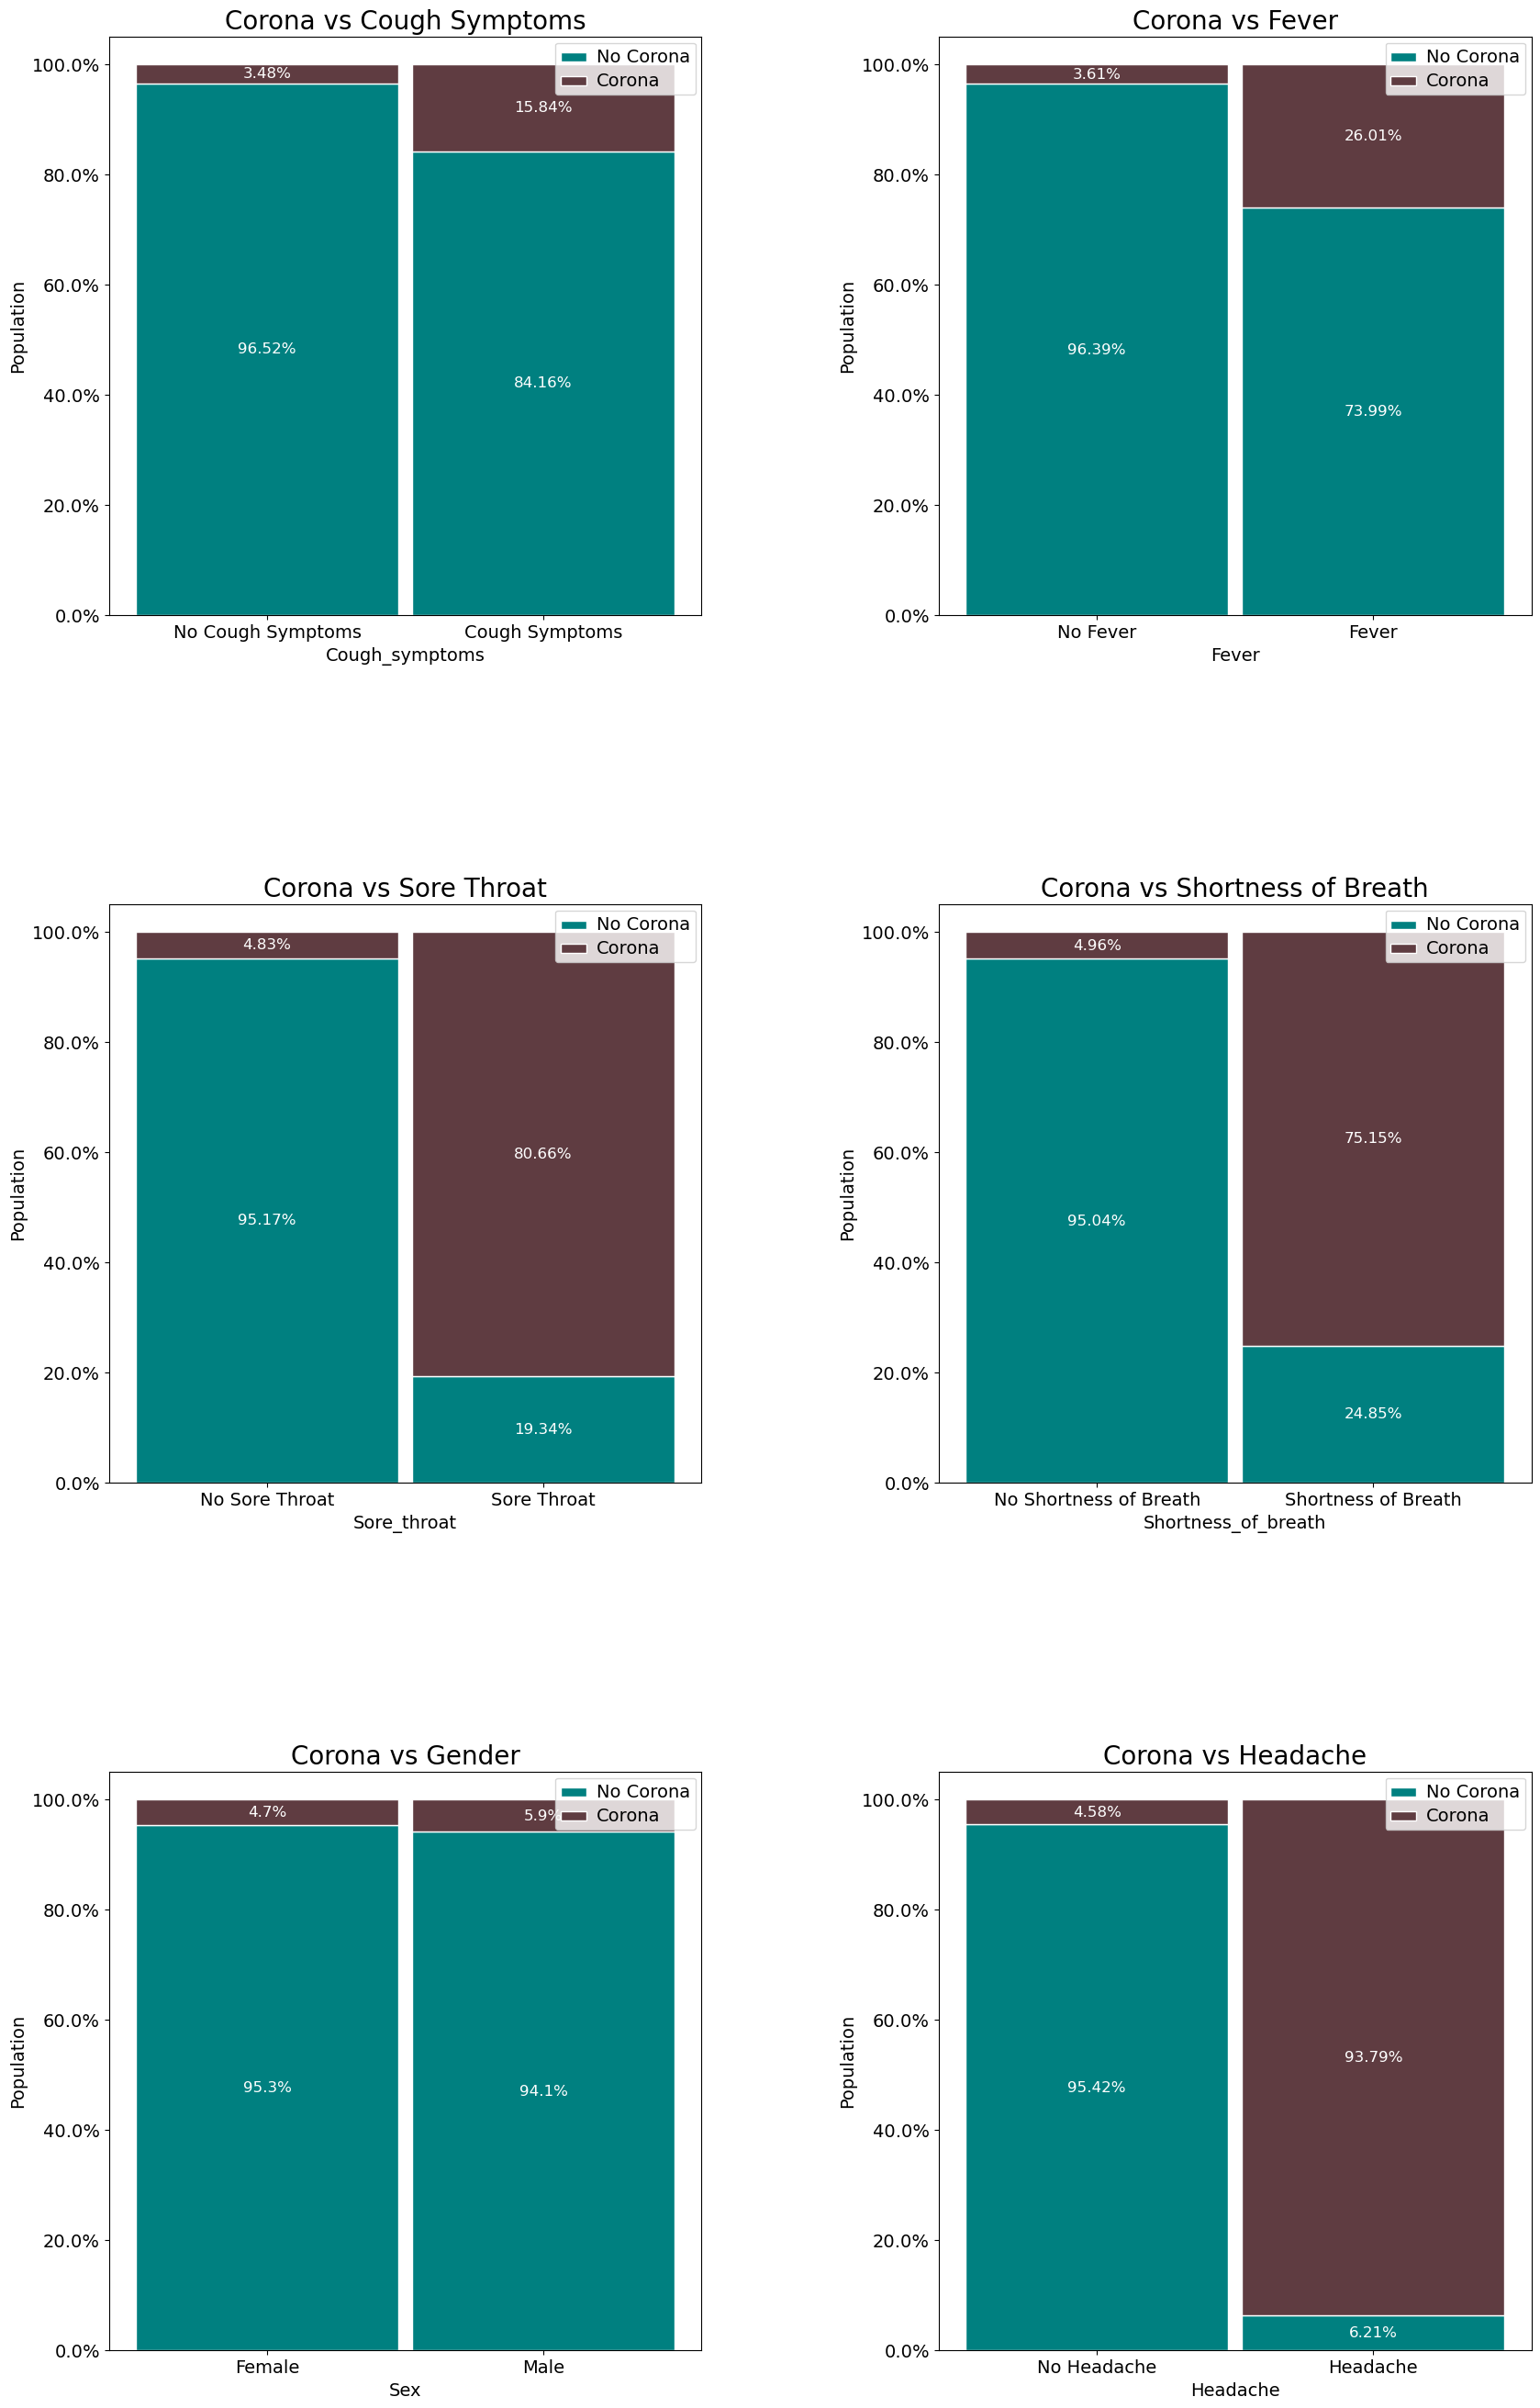

In [44]:
from operator import add

def stacked_barchart(data, title=None, ylabel=None, xlabel=None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))
    
    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])
    

    flat_list = [item for sublist in data.T.values for item in sublist]
    
    for i, d in zip(ax.patches, flat_list):
        data_label = str(round(i.get_height(), 2)) + "%"
        ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, data_label,
                ha='center', va='center', fontdict=dict(color='white', size=12))  


    for item in ([ax.title]):
        item.set_fontsize(20)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='14')
    

# Set up the grid for subplots
fig = plt.gcf()
fig.set_size_inches(20, 45)
grid_rows = 4
grid_cols = 2

# Adjusting the size of the subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)

# Draw Cough symptoms vs Corona outcome
plt.subplot(grid_rows, grid_cols, 1)
temp_cough = covid_encoded[['Cough_symptoms', 'Corona']].groupby(['Cough_symptoms', 'Corona']).size().unstack('Corona')
temp_cough.rename(index={0: 'No Cough Symptoms', 1: 'Cough Symptoms'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_cough, title='Corona vs Cough Symptoms', ylabel='Population')

# Draw Fever vs Corona outcome
plt.subplot(grid_rows, grid_cols, 2)
temp_fever = covid_encoded[['Fever', 'Corona']].groupby(['Fever', 'Corona']).size().unstack('Corona')
temp_fever.rename(index={0: 'No Fever', 1: 'Fever'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_fever, title='Corona vs Fever', ylabel='Population')

# Draw Sore throat vs Corona outcome
plt.subplot(grid_rows, grid_cols, 3)
temp_sore_throat = covid_encoded[['Sore_throat', 'Corona']].groupby(['Sore_throat', 'Corona']).size().unstack('Corona')
temp_sore_throat.rename(index={0: 'No Sore Throat', 1: 'Sore Throat'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_sore_throat, title='Corona vs Sore Throat', ylabel='Population')

# Draw Shortness of breath vs Corona outcome
plt.subplot(grid_rows, grid_cols, 4)
temp_shortness_of_breath = covid_encoded[['Shortness_of_breath', 'Corona']].groupby(['Shortness_of_breath', 'Corona']).size().unstack('Corona')
temp_shortness_of_breath.rename(index={0: 'No Shortness of Breath', 1: 'Shortness of Breath'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_shortness_of_breath, title='Corona vs Shortness of Breath', ylabel='Population')

# Draw Gender vs Corona outcome
plt.subplot(grid_rows, grid_cols, 5)
temp_sex = covid_encoded[['Sex', 'Corona']].groupby(['Sex', 'Corona']).size().unstack('Corona')
temp_sex.rename(index={0: 'Female', 1: 'Male'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_sex, title='Corona vs Gender', ylabel='Population')

# Draw Headache vs Corona outcome
plt.subplot(grid_rows, grid_cols, 6)
temp_head = covid_encoded[['Headache', 'Corona']].groupby(['Headache', 'Corona']).size().unstack('Corona')
temp_head.rename(index={0: 'No Headache', 1: 'Headache'}, columns={0: 'No Corona', 1: 'Corona'}, inplace=True)
stacked_barchart(temp_head, title='Corona vs Headache', ylabel='Population')


plt.show()

Due to the imbalanced nature of the dataset, drawing firm conclusions is challenging. However, based on observations, the following conclusions that can be drawn:

- The percentage of people with COVID is higher among those who have **cough symptoms**.
- **Fever** is also identified as another significant factor associated with COVID.
- In our dataset, individuals who suffered from **headaches** are more prone to COVID, making it an important factor.
- Approximately 75% of people experiencing **shortness of breath** have been infected by COVID.
- **Sore throat** is also an important factor and is found more frequently in people who have COVID.
- Slightly more males are suffering from COVID than females.

### Data Preprocessing

#### Dealing with Missing values

In [45]:
covid_encoded.isnull().mean() * 100

Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  1.395742
Age_60_above           45.659284
Sex                     7.015650
dtype: float64

Because more than 45% of the data is missing in the 'Age_60_above' variable, we've decided to remove it from our analysis.

In [46]:
covid_1 = covid_encoded.drop(columns = ['Age_60_above'])

In [47]:
covid_1.isnull().mean() * 100

Cough_symptoms         0.090372
Fever                  0.090372
Sore_throat            0.000359
Shortness_of_breath    0.000359
Headache               0.000359
Corona                 1.395742
Sex                    7.015650
dtype: float64

Since using mode imputation won't work well for us, So we're just going to remove the rows with missing values.

In [48]:
# Drop missing values
covid_1.dropna(inplace=True)

In [49]:
covid_1.isnull().mean() * 100

Cough_symptoms         0.0
Fever                  0.0
Sore_throat            0.0
Shortness_of_breath    0.0
Headache               0.0
Corona                 0.0
Sex                    0.0
dtype: float64

**Our dataset is now entirely free from missing values.**

In [50]:
# Change dtype from float to int
covid_1['Cough_symptoms'] = covid_1['Cough_symptoms'].astype(int)
covid_1['Fever'] = covid_1['Fever'].astype(int)
covid_1['Sore_throat'] = covid_1['Sore_throat'].astype(int)
covid_1['Shortness_of_breath'] = covid_1['Shortness_of_breath'].astype(int)
covid_1['Headache'] = covid_1['Headache'].astype(int)
covid_1['Corona'] = covid_1['Corona'].astype(int)
covid_1['Sex'] = covid_1['Sex'].astype(int)

In [51]:
covid_1.dtypes

Cough_symptoms         int32
Fever                  int32
Sore_throat            int32
Shortness_of_breath    int32
Headache               int32
Corona                 int32
Sex                    int32
dtype: object

In [52]:
covid_1.sample(5)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
150082,0,0,0,0,0,0,0
179103,0,0,0,0,0,0,0
122736,0,0,0,0,0,0,1
221366,0,0,0,0,0,0,0
241956,0,0,0,0,0,0,0


In [53]:
covid_1.shape

(255668, 7)

We have only six features in our dataset, so we have decided to use all of them in our machine learning model.

### Load and Prepare Data

In [54]:
X = covid_1.drop(['Corona'], axis=1)
y = covid_1['Corona']

### Feature Selection

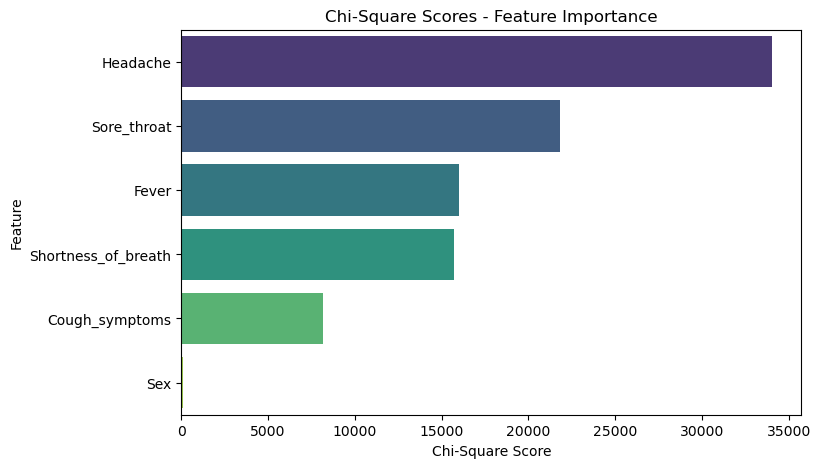

In [55]:
k_best = 6
chi2_selector = SelectKBest(chi2, k=k_best)
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature indices
selected_features = chi2_selector.get_support()

# Create a DataFrame with column names and chi-square scores
features_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_selector.scores_})

# Filter the DataFrame based on selected features
features_df = features_df[features_df['Feature'].isin(X.columns[selected_features])]

# Sort the DataFrame by chi-square scores in descending order
features_df = features_df.sort_values(by='Chi2 Score', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Chi2 Score', y='Feature', data=features_df, palette='viridis')
plt.title('Chi-Square Scores - Feature Importance')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.show()

Our analysis suggests that gender does not play a significant role, as confirmed by the Chi-square test.

### X and y array

In [56]:
X = covid_1.drop(['Corona', 'Sex'], axis=1)
y = covid_1['Corona']

### Resampling with SMOTE

In [57]:
# Define the resampling strategy
over = SMOTE(sampling_strategy = 'auto')  

# Apply resampling to the data
X_resampled, y_resampled = over.fit_resample(X, y)

In [58]:
y_resampled.value_counts()

0    242136
1    242136
Name: Corona, dtype: int64

### Train Test Split

In [59]:
# Split resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.15, random_state = 42)

### 1. Random Forest Classifier

In [60]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### Hyperparameter Tuning with Randomized SearchCV

In [63]:
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


### Model Evaluation 

In [64]:
# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     36354
           1       0.81      0.64      0.71     36287

    accuracy                           0.75     72641
   macro avg       0.76      0.74      0.74     72641
weighted avg       0.76      0.75      0.74     72641



### Try Different Algorithms to Find the Best

### 2. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_classifier.predict(X_test)

In [66]:
# Evaluate the classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nConfusion Matrix:\n", conf_matrix_logreg)
print("\nClassification Report:\n", classification_rep_logreg)

Logistic Regression Accuracy: 0.7450475626712187

Confusion Matrix:
 [[30912  5442]
 [13078 23209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77     36354
           1       0.81      0.64      0.71     36287

    accuracy                           0.75     72641
   macro avg       0.76      0.74      0.74     72641
weighted avg       0.76      0.75      0.74     72641



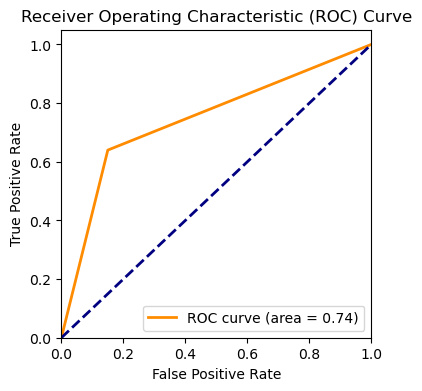

In [74]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Conclusion
- The most important features for predicting COVID-19 are **Headache, Sore throat**, and **Fever**.
- Both machine learning models, Random Forest and Logistic Regression, have produced identical predictions in our analysis.
- Balancing the dataset using SMOTE enhanced the model's ability to detect issues, but the improvement was not as expected.

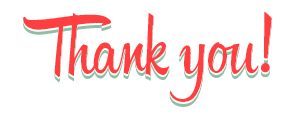